In [1]:
import pandas as pd
import ast
from datetime import timezone
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('complete_set.csv')

In [3]:
#removing all the sales of the products that were not found in the product data set 
df = df[df['_id_y'].notna()]
df = df.reset_index()
len(df)

664427

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664427 entries, 0 to 664426
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  664427 non-null  int64  
 1   Unnamed: 0.1           664427 non-null  int64  
 2   _id_x                  664427 non-null  object 
 3   art_url                664427 non-null  object 
 4   item_type              664427 non-null  object 
 5   utc_date               664427 non-null  float64
 6   country_code           664427 non-null  object 
 7   track_album_slug_text  2125 non-null    object 
 8   country                664427 non-null  object 
 9   slug_type              664427 non-null  object 
 10  amount_paid_fmt        664427 non-null  object 
 11  item_price             664427 non-null  float64
 12  item_description       664421 non-null  object 
 13  art_id                 664293 non-null  float64
 14  join_key               664427 non-nu

In [5]:
df.head()

,index,Unnamed: 0.1,_id_x,art_url,item_type,utc_date,country_code,track_album_slug_text,country,slug_type,amount_paid_fmt,item_price,item_description,art_id,join_key,amount_paid,releases,artist_name,currency,album_title,amount_paid_usd,package_image_id,amount_over_fmt,item_slug,addl_count,Unnamed: 0,_id_y,albumRelease,numTracks,name,dateModified,@id,keywords,image,comment,byArtist,track,@type,datePublished,@context,duration,offers,duration_secs,inAlbum,url,description,isrcCode,recordingOf,@graph
0,0,0,1599688803.5175&//girlbanddublin.bandcamp.com/...,https://f4.bcbits.com/img/a0206405257_7.jpg,a,1.599689e+09,gb,NaN,United Kingdom,a,$9.99,9.99,Live at Vicar Street,2.064053e+08,//girlbanddublin.bandcamp.com/album/live-at-vi...,9.99,NaN,Girl Band,USD,NaN,9.99,NaN,NaN,NaN,NaN,260024.0,https://girlbanddublin.bandcamp.com/album/live...,[{'@id': 'https://girlbanddublin.bandcamp.com/...,14.0,Live at Vicar Street,02 Sep 2020 13:45:09 GMT,https://girlbanddublin.bandcamp.com/album/live...,"Alternative, noise, post-punk, Ireland",https://f4.bcbits.com/img/a0206405257_10.jpg,"[{'text': [""Possibly the greatest live album s...","{'@id': 'https://girlbanddublin.bandcamp.com',...","{'numberOfItems': 14, 'itemListElement': [{'po...",MusicAlbum,02 Sep 2020 13:45:09 GMT,https://schema.org,NaN,NaN,NaN,NaN,NaN,"In November 2019, Girl Band played back to bac...",NaN,NaN,NaN
1,1,1,1599688805.27838&//maharettarecords.bandcamp.c...,https://f4.bcbits.com/img/a2984241552_7.jpg,a,1.599689e+09,fi,NaN,Finland,a,£1,1.00,Neurogen,2.984242e+09,//maharettarecords.bandcamp.com/album/neurogen,1.00,NaN,Jirah,GBP,NaN,1.30,NaN,NaN,NaN,NaN,344826.0,https://maharettarecords.bandcamp.com/album/ne...,"[{'@type': ['Product', 'MusicRelease'], 'offer...",1.0,Neurogen,28 Mar 2020 15:10:47 GMT,https://maharettarecords.bandcamp.com/album/ne...,"Electronic, Psychedelic Trance, psytrance, London",https://f4.bcbits.com/img/a2984241552_10.jpg,NaN,"{'@type': 'MusicGroup', 'sameAs': ['http://www...","{'@type': 'ItemList', 'numberOfItems': 1, 'ite...",MusicAlbum,28 Mar 2020 15:10:13 GMT,https://schema.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,1599688805.90646&//maharettarecords.bandcamp.c...,https://f4.bcbits.com/img/a3320494770_7.jpg,a,1.599689e+09,fi,NaN,Finland,a,£3,3.00,The Last Snare Bender,3.320495e+09,//maharettarecords.bandcamp.com/album/the-last...,3.00,NaN,D-Ther,GBP,NaN,3.90,NaN,NaN,NaN,NaN,310238.0,https://maharettarecords.bandcamp.com/album/th...,[{'url': 'https://maharettarecords.bandcamp.co...,2.0,The Last Snare Bender,21 Aug 2020 08:55:39 GMT,https://maharettarecords.bandcamp.com/album/th...,"Electronic, Psychedelic Trance, psytrance, London",https://f4.bcbits.com/img/a3320494770_10.jpg,NaN,"{'sameAs': ['http://www.maharettarecords.com',...","{'itemListElement': [{'@type': 'ListItem', 'po...",MusicAlbum,21 Aug 2020 08:55:39 GMT,https://schema.org,NaN,NaN,NaN,NaN,NaN,Maharetta Records proudly presents 'The Last S...,NaN,NaN,NaN
3,3,3,1599688809.07942&//linguaignota.bandcamp.com/t...,https://f4.bcbits.com/img/a3428873396_7.jpg,t,1.599689e+09,us,NaN,United States,t,$1,1.00,O Ruthless Great Divine Director,3.428873e+09,//linguaignota.bandcamp.com/track/o-ruthless-g...,1.00,NaN,LINGUA IGNOTA,USD,NaN,1.00,NaN,NaN,NaN,NaN,16820.0,https://linguaignota.bandcamp.com/track/o-ruth...,NaN,NaN,O Ruthless Great Divine Director,26 Mar 2020 05:27:55 GMT,https://linguaignota.bandcamp.com/track/o-ruth...,"Experimental, retribution, United States",['https://f4.bcbits.com/img/a3428873396_10.jpg'],[{'author': {'image': 'https://f4.bcbits.com/i...,{'image': 'https://f4.bcbits.com/img/001206732...,NaN,"['MusicRecording', 'Product']",26 Mar 2020 05:27:56 GMT,https://schema.org,P00H05M13S,"{'price': 1.0, 'priceCurrency': 'USD', 'availa...",313.914,NaN,https://linguaignota.bandcamp.com/track/o-ruth...,NaN,USA2P2009256,{'lyrics': {'text': 'EVERYONE I KNOW’S A FUCKI...,NaN
4,4,4,1599688812.69267&//sofiefatouretchi.bandcamp.c...,https://f4.bcbits.com/img/a0772371002_7.jpg,t,1.599689e+09,us,N

In [6]:
#removing insignificant columns
df = df.drop(['index', 'Unnamed: 0.1', '_id_x', 'art_url', 'art_id', 'join_key', 'Unnamed: 0',
              '_id_y', '@id', 'image' ,'@context', 'package_image_id', 'isrcCode', 'url',
              'track_album_slug_text', 'releases', '@graph', 'datePublished', 'dateModified',
             'addl_count', 'item_slug', '@type'], axis = 1)
#removing double columns
df =  df.drop(['country', 'slug_type', 'amount_paid_fmt', 'duration', 'amount_over_fmt'], axis = 1)

#removing text columns
df = df.drop(['item_description', 'artist_name', 'album_title', 'name', 'comment', 'description', 'recordingOf'], axis = 1)

In [7]:
df.head()

,item_type,utc_date,country_code,item_price,amount_paid,currency,amount_paid_usd,albumRelease,numTracks,keywords,byArtist,track,offers,duration_secs,inAlbum
0,a,1.599689e+09,gb,9.99,9.99,USD,9.99,[{'@id': 'https://girlbanddublin.bandcamp.com/...,14.0,"Alternative, noise, post-punk, Ireland","{'@id': 'https://girlbanddublin.bandcamp.com',...","{'numberOfItems': 14, 'itemListElement': [{'po...",NaN,NaN,NaN
1,a,1.599689e+09,fi,1.00,1.00,GBP,1.30,"[{'@type': ['Product', 'MusicRelease'], 'offer...",1.0,"Electronic, Psychedelic Trance, psytrance, London","{'@type': 'MusicGroup', 'sameAs': ['http://www...","{'@type': 'ItemList', 'numberOfItems': 1, 'ite...",NaN,NaN,NaN
2,a,1.599689e+09,fi,3.00,3.00,GBP,3.90,[{'url': 'https://maharettarecords.bandcamp.co...,2.0,"Electronic, Psychedelic Trance, psytrance, London","{'sameAs': ['http://www.maharettarecords.com',...","{'itemListElement': [{'@type': 'ListItem', 'po...",NaN,NaN,NaN
3,t,1.599689e+09,us,1.00,1.00,USD,1.00,NaN,NaN,"Experimental, retribution, United States",{'image': 'https://f4.bcbits.com/img/001206732...,NaN,"{'price': 1.0, 'priceCurrency': 'USD', 'availa...",313.914,NaN
4,t,1.599689e+09,us,1.29,1.29,USD,1.29,NaN,NaN,"Alternative, alternative, Vienna",{'image': 'https://f4.bcbits.com/img/001805937...,NaN,{'url': 'https://sofiefatouretchi.bandcamp.com...,181.191,"{'name': 'Cult Survivor', '@id': 'https://sofi..."


## Missing Values

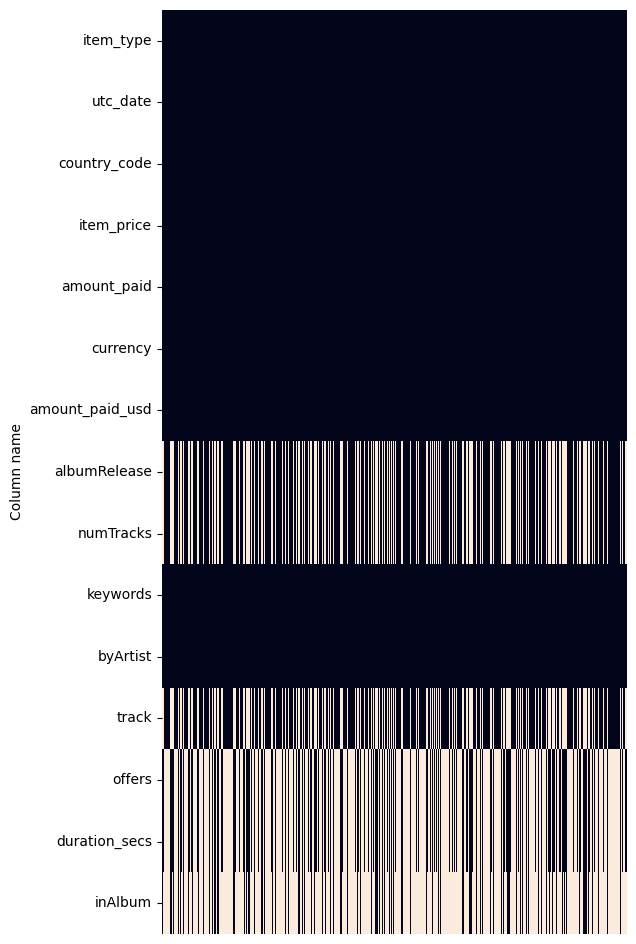

In [8]:
plt.figure(figsize=(6,12))

ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar=False, ax=ax)

plt.title('')
plt.xlabel('')
plt.ylabel('Column name') 
ax.set_xticks([])

plt.savefig('heatmap.png', bbox_inches='tight', dpi=150)
plt.show()

## Missing values  and feature transformation/removal

### 1. albumRelease

In [9]:
albumRelease = df['albumRelease']

In [10]:
albumRelease_count = []

def album_release_count(lst):
    for x in range(0, len(lst)): 
        if df['item_type'][x] == 'a':
            dic = ast.literal_eval(lst[x])
            albumRelease_count.append(len(dic))

        elif df['item_type'][x] == 't': 
            albumRelease_count.append(1)
        else:
            continue

In [11]:
albumReleases = album_release_count(albumRelease)

In [12]:
df = df.drop('albumRelease', axis = 1)

In [13]:
df['albumRelease'] = albumRelease_count

### 2. numTracks

In [14]:
numtracks = df['numTracks']
num_tracks = [] 

def num_tracks_track(lst):
    for x in lst:
        if math.isnan(x) == True:
            num_tracks.append(1)
        else:
            num_tracks.append(x)

num_tracks_track(numtracks)
df['numTracks'] = num_tracks

### 3. inAlbum

In [15]:
inAlbum = df['inAlbum']
item_type = df['item_type']
mod_inAlbum = []

def new_inalbum(lst):
    for x in range(0, len(lst)):
        if item_type[x] == 'a':
            mod_inAlbum.append('is')
        elif item_type[x] == 't':
            if type(lst[x]) == str:
                mod_inAlbum.append('in')
            else:
                mod_inAlbum.append('not')

                
new_inalbum(inAlbum)

In [16]:
df = df.drop('inAlbum', axis = 1)  
df['inAlbum'] = mod_inAlbum

### 4. track, offers & duration secs

In [17]:
offers = df['offers']
offers[3]

"{'price': 1.0, 'priceCurrency': 'USD', 'availability': 'OnlineOnly', '@type': 'Offer', 'priceSpecification': {'minPrice': 1.0}, 'url': 'https://linguaignota.bandcamp.com/track/o-ruthless-great-divine-director#buy'}"

In [18]:
tracks = df['track']
tracks[0]

"{'numberOfItems': 14, 'itemListElement': [{'position': 1, '@type': 'ListItem', 'item': {'@id': 'https://girlbanddublin.bandcamp.com/track/pears-for-lunch-live-at-vicar-street', 'url': 'https://girlbanddublin.bandcamp.com/track/pears-for-lunch-live-at-vicar-street', 'duration': 'P00H04M27S', '@type': ['MusicRecording'], 'name': 'Pears for Lunch (Live at Vicar Street)', 'duration_secs': 267.26}}, {'position': 2, '@type': 'ListItem', 'item': {'@id': 'https://girlbanddublin.bandcamp.com/track/fucking-butter-live-at-vicar-street', 'url': 'https://girlbanddublin.bandcamp.com/track/fucking-butter-live-at-vicar-street', 'duration': 'P00H07M49S', '@type': ['MusicRecording'], 'name': 'Fucking Butter (Live at Vicar Street)', 'duration_secs': 469.2}}, {'position': 3, '@type': 'ListItem', 'item': {'@id': 'https://girlbanddublin.bandcamp.com/track/lawman-live-at-vicar-street', 'url': 'https://girlbanddublin.bandcamp.com/track/lawman-live-at-vicar-street', 'duration': 'P00H06M51S', '@type': ['MusicR

In [19]:
df = df.drop(['track', 'offers', 'duration_secs'], axis = 1)

In [20]:
df.head()

,item_type,utc_date,country_code,item_price,amount_paid,currency,amount_paid_usd,numTracks,keywords,byArtist,albumRelease,inAlbum
0,a,1.599689e+09,gb,9.99,9.99,USD,9.99,14.0,"Alternative, noise, post-punk, Ireland","{'@id': 'https://girlbanddublin.bandcamp.com',...",1,is
1,a,1.599689e+09,fi,1.00,1.00,GBP,1.30,1.0,"Electronic, Psychedelic Trance, psytrance, London","{'@type': 'MusicGroup', 'sameAs': ['http://www...",1,is
2,a,1.599689e+09,fi,3.00,3.00,GBP,3.90,2.0,"Electronic, Psychedelic Trance, psytrance, London","{'sameAs': ['http://www.maharettarecords.com',...",1,is
3,t,1.599689e+09,us,1.00,1.00,USD,1.00,1.0,"Experimental, retribution, United States",{'image': 'https://f4.bcbits.com/img/001206732...,1,not
4,t,1.599689e+09,us,1.29,1.29,USD,1.29,1.0,"Alternative, alternative, Vienna",{'image': 'https://f4.bcbits.com/img/001805937...,1,in


## Feature transformation

### byArtist

In [21]:
byArtist = df['byArtist']

In [22]:
by_artist_list = []
def str_to_dict(lst):
    for x in lst:
        if type(x) == str:
            y = ast.literal_eval(x)
            by_artist_list.append(y)
        else:
            by_artist_list.append(float('nan'))
str_to_dict(byArtist)

byArtist_genre_lst = []

def get_keys(lst): 
    for x in lst:
        if type(x) == dict:
            genre = x.get('genre')
            byArtist_genre_lst.append(genre)
        else:
            byArtist_genre_lst.append(float('nan'))
get_keys(by_artist_list)

byArtist_genre = []

def mod_genre(lst):
    for x in lst:
        if type(x) == str:
            x = x.replace("https://bandcamp.com/tag/","")
            byArtist_genre.append(x)
        else:
            byArtist_genre.append(float('nan'))
mod_genre(byArtist_genre_lst)

df = df.drop('byArtist', axis = 1)
df['genre'] = byArtist_genre

In [23]:
df['genre'].isna().sum()

51685

In [24]:
df['genre'] = df['genre'].fillna('other')

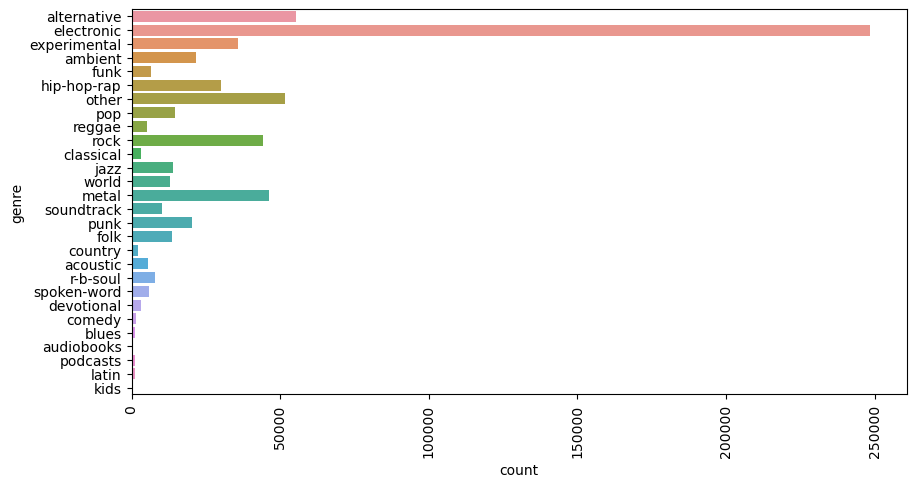

In [25]:
fig = plt.figure(figsize=(10, 5))

sns.countplot(y=df["genre"])

plt.xticks(rotation=90)
plt.savefig('genre_count.png')

### Keywords

In [26]:
#number of missing values in keywords
df['keywords'].isna().sum()

339

In [27]:
keywords = df['keywords']
keyword_lst = []

def keyword_list(lst):
    for i in range(0, len(lst)):
        j = str(lst[i])
        j = j.replace(" ", "").replace("-", "").replace(".", "").replace("&", "").replace("'", "").lower()
        x = j.split(",")
        for k in range(0,1):
            if len(x) == 1:
                keyword_lst.append(x[0])
            else:
                if x[k] == df['genre'][i]:
                    if len(x) == 2:
                        keyword_lst.append(x[1])
                    else:
                        if x[k+1] == df['genre'][i]:
                            keyword_lst.append(x[k+2])
                        else:
                            keyword_lst.append(x[k+1])
                else:
                    keyword_lst.append(x[k])
keyword_list(keywords)

In [28]:
#extract top 150 tags and turn into list
df['keyword_lst'] = keyword_lst
tags = pd.DataFrame(df['keyword_lst'].value_counts()[:151])
tags_list = tags.index.tolist()
#remove nan
tags_list = tags_list[1:]

In [29]:
top_tags = []

def modify_tags(keyword_lst, lst2):
    for x in range(0, len(keyword_lst)):
        if keyword_lst[x] in lst2:
            top_tags.append(keyword_lst[x])
        else:
            top_tags.append('other')

modify_tags(keyword_lst, tags_list)

In [30]:
df['tags'] = top_tags
df = df.drop(['keywords', 'keyword_lst'], axis = 1)

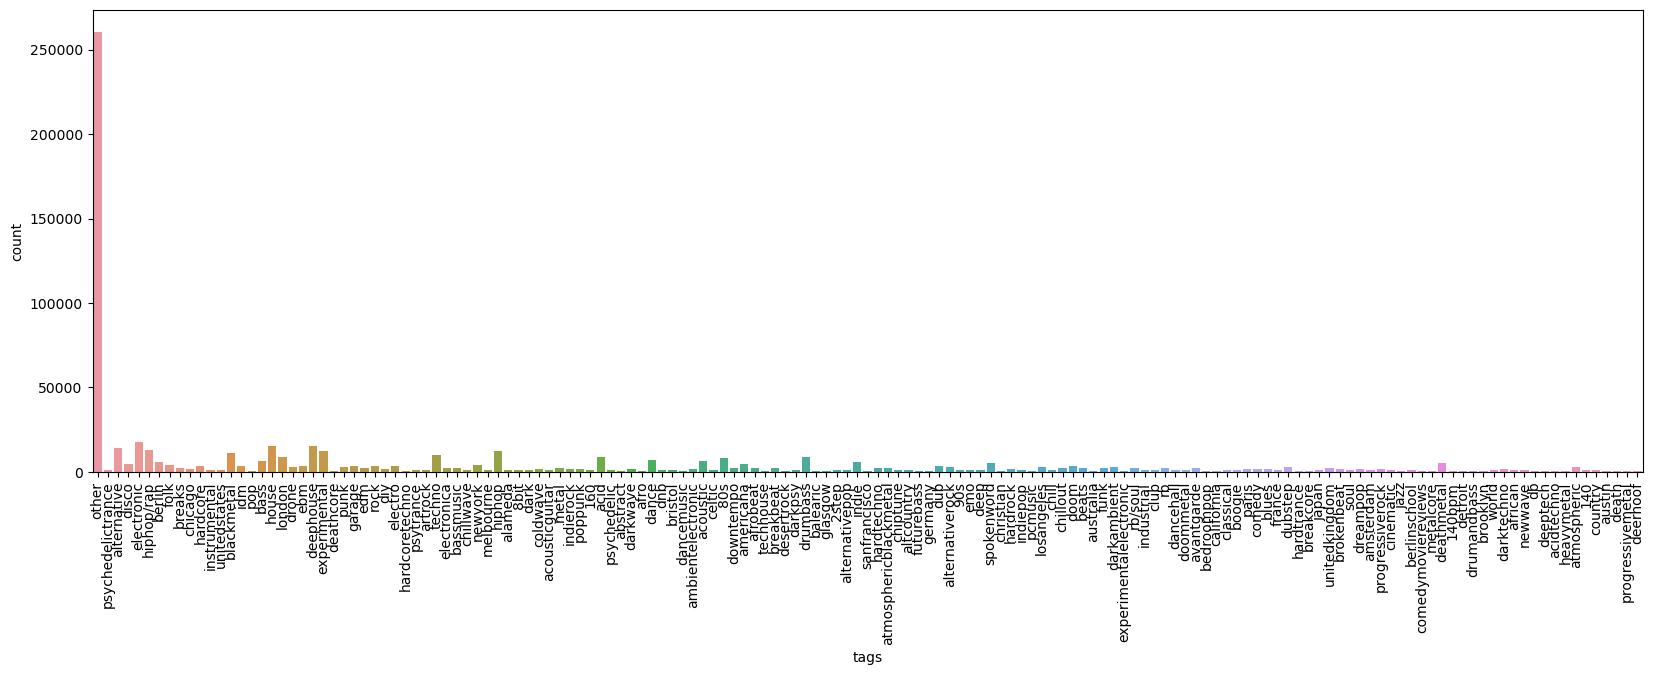

In [31]:
plt.figure(figsize=(20,6))

ax = sns.countplot(x = df['tags'])
ax.tick_params(axis='x', rotation=90)

In [32]:
df['tags'].nunique()

151

### item_price

In [33]:
# conversion rate
conversion_rate = df['amount_paid_usd'] / df['amount_paid']
df['item_price'] = df['item_price'] * conversion_rate

In [34]:
df = df.drop('amount_paid', axis = 1)
df.head()

,item_type,utc_date,country_code,item_price,currency,amount_paid_usd,numTracks,albumRelease,inAlbum,genre,tags
0,a,1.599689e+09,gb,9.99,USD,9.99,14.0,1,is,alternative,other
1,a,1.599689e+09,fi,1.30,GBP,1.30,1.0,1,is,electronic,psychedelictrance
2,a,1.599689e+09,fi,3.90,GBP,3.90,2.0,1,is,electronic,psychedelictrance
3,t,1.599689e+09,us,1.00,USD,1.00,1.0,1,not,experimental,other
4,t,1.599689e+09,us,1.29,USD,1.29,1.0,1,in,alternative,other


### utc_date

In [35]:
utc_datetime = [datetime.datetime.utcfromtimestamp(x) for x in df['utc_date']]
day = [y.strftime('%w') for y in utc_datetime] #0 for sunday through 6 for saturday
df['day'] = day
df.head()

,item_type,utc_date,country_code,item_price,currency,amount_paid_usd,numTracks,albumRelease,inAlbum,genre,tags,day
0,a,1.599689e+09,gb,9.99,USD,9.99,14.0,1,is,alternative,other,3
1,a,1.599689e+09,fi,1.30,GBP,1.30,1.0,1,is,electronic,psychedelictrance,3
2,a,1.599689e+09,fi,3.90,GBP,3.90,2.0,1,is,electronic,psychedelictrance,3
3,t,1.599689e+09,us,1.00,USD,1.00,1.0,1,not,experimental,other,3
4,t,1.599689e+09,us,1.29,USD,1.29,1.0,1,in,alternative,other,3


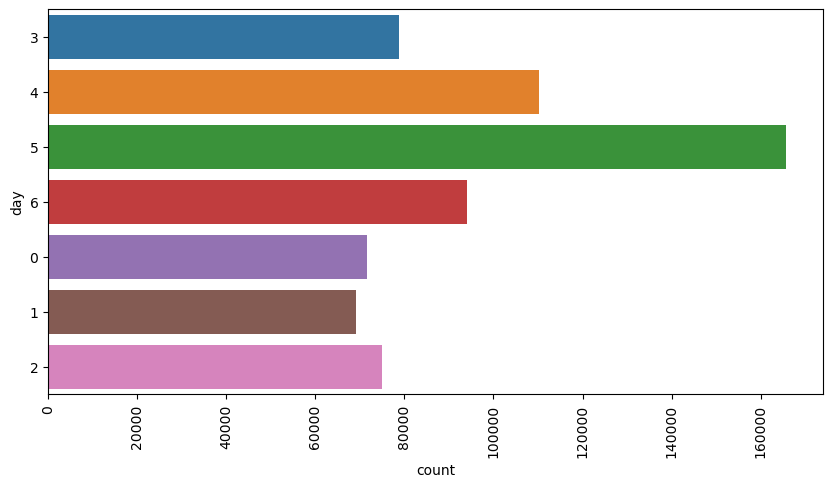

In [36]:
fig = plt.figure(figsize=(10, 5))

sns.countplot(y=df["day"])

plt.xticks(rotation=90)
plt.savefig('day_count.png')

### Bandcamp fridays

In [37]:
day_day = [y.strftime('%a/%d') for y in utc_datetime]
fridays = ['Fri/01', 'Fri/02', 'Fri/03', 'Fri/04', 'Fri/05', 'Fri/06', 'Fri/07']
BC_fridays = [1 if day in fridays else 0 for day in day_day]
df['BC_friday'] = BC_fridays

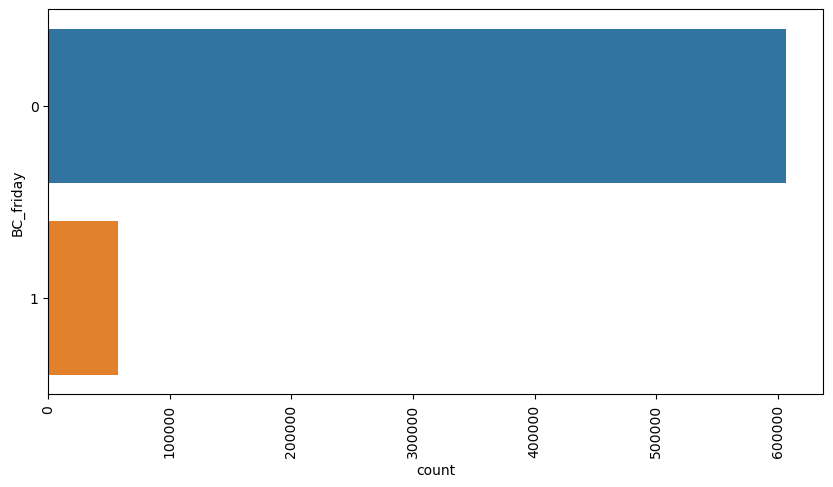

In [38]:
fig = plt.figure(figsize=(10, 5))

sns.countplot(y=df["BC_friday"])

plt.xticks(rotation=90)
plt.savefig('BCF_count.png')

In [39]:
df = df.drop('utc_date', axis = 1)

In [40]:
df.head()

,item_type,country_code,item_price,currency,amount_paid_usd,numTracks,albumRelease,inAlbum,genre,tags,day,BC_friday
0,a,gb,9.99,USD,9.99,14.0,1,is,alternative,other,3,0
1,a,fi,1.30,GBP,1.30,1.0,1,is,electronic,psychedelictrance,3,0
2,a,fi,3.90,GBP,3.90,2.0,1,is,electronic,psychedelictrance,3,0
3,t,us,1.00,USD,1.00,1.0,1,not,experimental,other,3,0
4,t,us,1.29,USD,1.29,1.0,1,in,alternative,other,3,0


In [41]:
#checking for missing values after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664427 entries, 0 to 664426
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_type        664427 non-null  object 
 1   country_code     664427 non-null  object 
 2   item_price       664427 non-null  float64
 3   currency         664427 non-null  object 
 4   amount_paid_usd  664427 non-null  float64
 5   numTracks        664427 non-null  float64
 6   albumRelease     664427 non-null  int64  
 7   inAlbum          664427 non-null  object 
 8   genre            664427 non-null  object 
 9   tags             664427 non-null  object 
 10  day              664427 non-null  object 
 11  BC_friday        664427 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 60.8+ MB


## Outliers

### Numerical variables

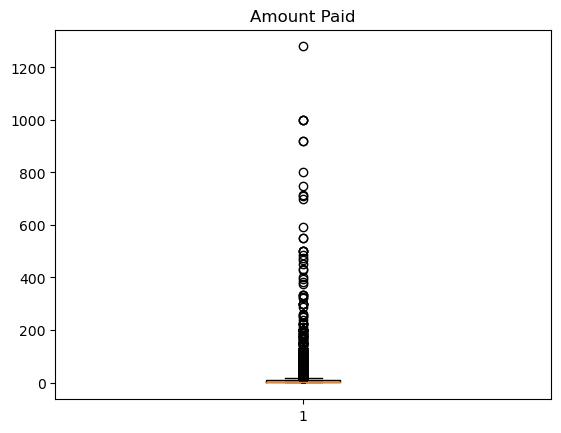

In [42]:
amount_paid = df['amount_paid_usd'].values.tolist()
fig2, ax2 = plt.subplots()
ax2.set_title('Amount Paid')
ax2.boxplot(amount_paid)
plt.savefig('boxplot_amount_paid_outliers.png', bbox_inches='tight', dpi=150)

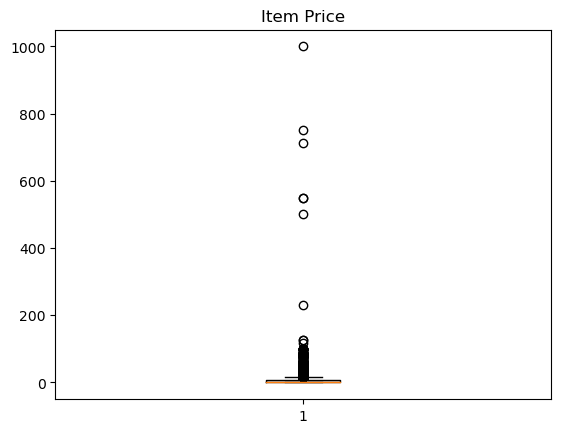

In [43]:
item_price = df['item_price'].values.tolist()
fig2, ax2 = plt.subplots()
ax2.set_title('Item Price')
ax2.boxplot(item_price)
plt.savefig('boxplot_item_price_outliers.png', bbox_inches='tight', dpi=150)

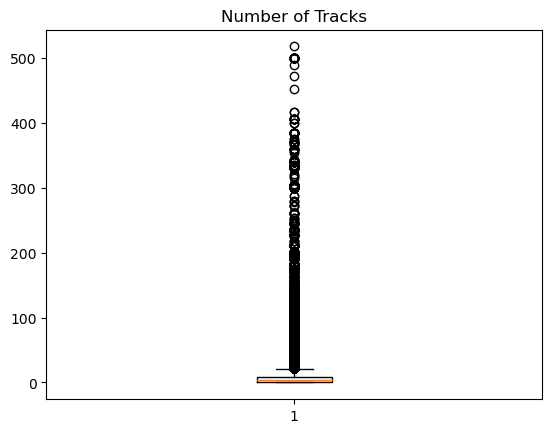

In [44]:
numTracks = df['numTracks'].values.tolist()
fig2, ax2 = plt.subplots()
ax2.set_title('Number of Tracks')
ax2.boxplot(numTracks)
plt.savefig('boxplot_numTracks_outliers.png', bbox_inches='tight', dpi=150)

In [45]:
#removing outliers for item price > 100 
print(len(df))
df = df[df['item_price'] < 100]
print(len(df))

664427
664412


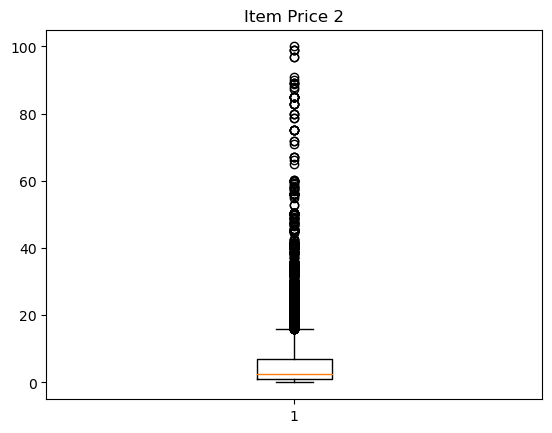

In [46]:
#reconstructing boxplot after outlier deletion

item_price2 = df['item_price'].values.tolist()
fig2, ax2 = plt.subplots()
ax2.set_title('Item Price 2')
ax2.boxplot(item_price2)
plt.savefig('boxplot_item_price2_outliers.png', bbox_inches='tight', dpi=150)

In [47]:
#removing outliers for amount paid > 200
print(len(df))
df = df[df['amount_paid_usd'] < 200]
print(len(df))

664412
664352


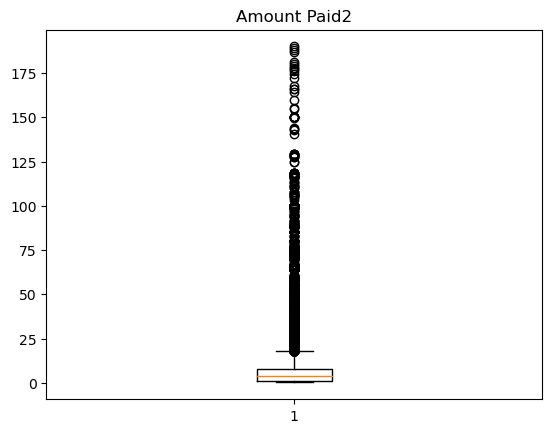

In [48]:
#reconstructing boxplot after outlier deletion

amount_paid2 = df['amount_paid_usd'].values.tolist()
fig2, ax2 = plt.subplots()
ax2.set_title('Amount Paid2')
ax2.boxplot(amount_paid2)
plt.savefig('boxplot_amount_paid2_outliers.png', bbox_inches='tight', dpi=150)

In [49]:
df = df.reset_index()

### Categorical variables

#### Country code

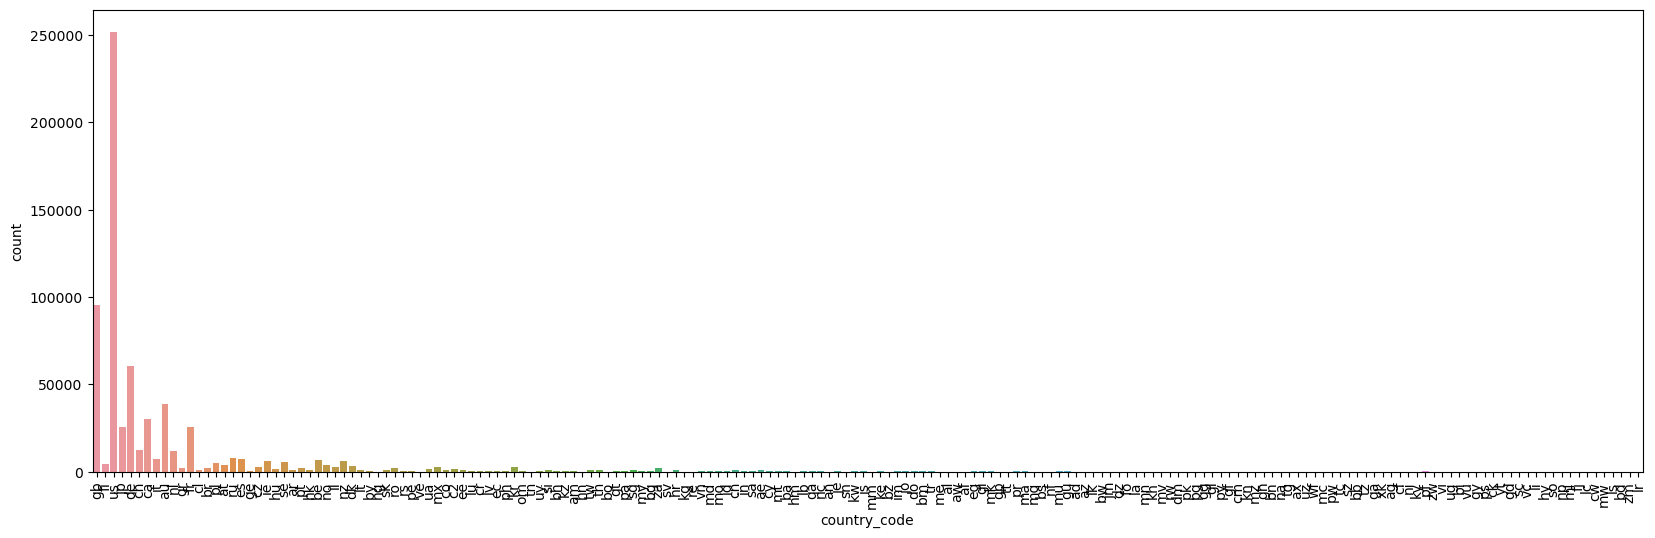

In [50]:
plt.figure(figsize=(20,6))

ax = sns.countplot(x = df['country_code'])
ax.tick_params(axis='x', rotation=90)

In [51]:
country_counts = pd.DataFrame(df['country_code'].value_counts())
country_counts = country_counts.reset_index()
country_counts.columns = ['country_code', 'counts']

#filter countries out 
country_counts = country_counts[country_counts['counts'] >= 10]
#create list of remaining countries
countries = [x for x in country_counts['country_code']]

#filter df
for x in range(0, len(df)):
    if df['country_code'][x] not in countries:
        df = df.drop(x)
    else:
        continue

In [52]:
len(df)

664179

#### Currency

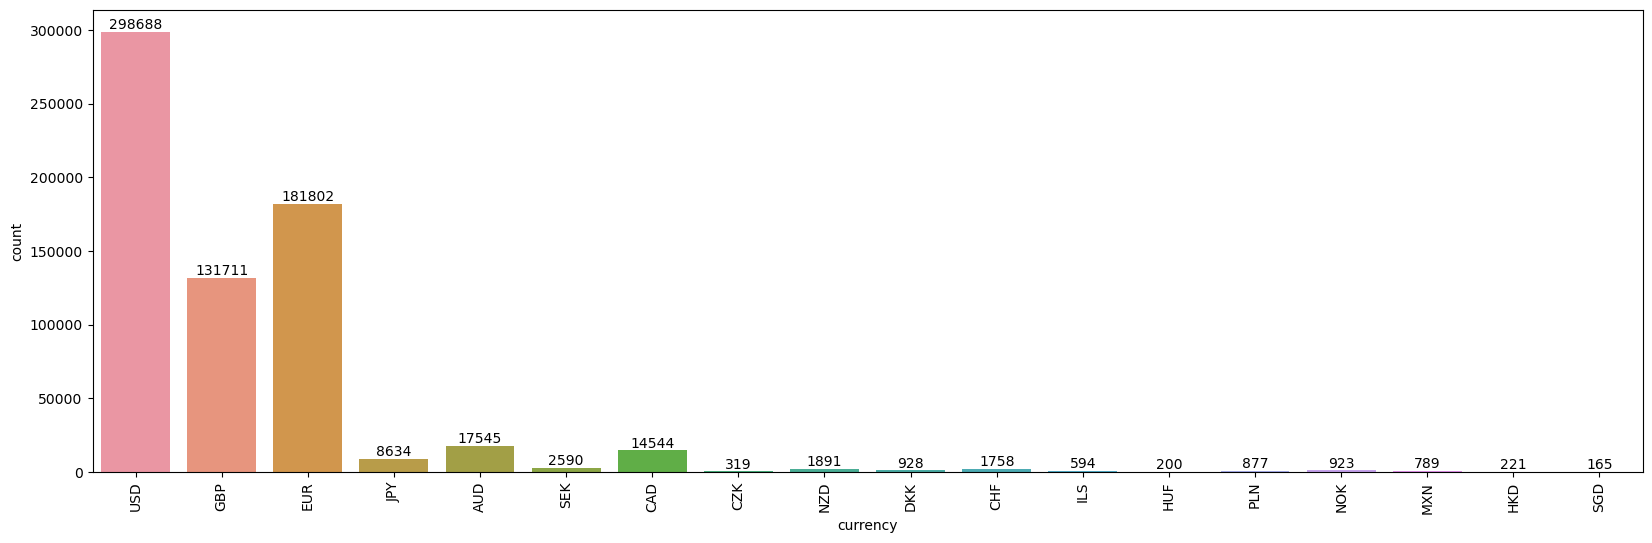

In [53]:
plt.figure(figsize=(20,6))

ax = sns.countplot(x = df['currency'])
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=90)

In [54]:
#counting unique values of categorical data
df['item_type'].nunique(), df['country_code'].nunique(), df['currency'].nunique(), df['genre'].nunique(), df['inAlbum'].nunique(), df['tags'].nunique(), df['BC_friday'].nunique(), df['day'].nunique()

(2, 128, 18, 28, 3, 151, 2, 7)

## Feature Transformation

### Categorical variables

In [55]:
#dummies of categorical variables

cat_cols = ['item_type', 'country_code', 'currency', 'genre', 'inAlbum', 'tags', 'day']

dummies = pd.get_dummies(df[cat_cols])

In [56]:
df

,index,item_type,country_code,item_price,currency,amount_paid_usd,numTracks,albumRelease,inAlbum,genre,tags,day,BC_friday
0,0,a,gb,9.99,USD,9.99,14.0,1,is,alternative,other,3,0
1,1,a,fi,1.30,GBP,1.30,1.0,1,is,electronic,psychedelictrance,3,0
2,2,a,fi,3.90,GBP,3.90,2.0,1,is,electronic,psychedelictrance,3,0
3,3,t,us,1.00,USD,1.00,1.0,1,not,experimental,other,3,0
4,4,t,us,1.29,USD,1.29,1.0,1,in,alternative,other,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
664347,664422,a,us,5.00,USD,5.00,12.0,2,is,world,acousticguitar,5,1
664348,664423,a,be,9.00,USD,9.00,6.0,1,is,alternative,other,5,1
664349,664424,t,au,1.29,USD,1.30,1.0,1,in,hip-hop-rap,hiphop/rap,5,1
664350,664425,t,au,1.29,USD,1.29,1.0,1,in,r-b-soul,afrobeat,5,1


In [57]:
dummies

,item_type_a,item_type_t,country_code_ad,country_code_ae,country_code_am,country_code_ar,country_code_at,country_code_au,country_code_aw,country_code_az,country_code_ba,country_code_bb,country_code_be,country_code_bg,country_code_bh,country_code_bm,country_code_bn,country_code_bo,country_code_br,country_code_bs,country_code_bw,country_code_by,country_code_c2,country_code_ca,country_code_ch,country_code_cl,country_code_cn,country_code_co,country_code_cr,country_code_cy,country_code_cz,country_code_de,country_code_dk,country_code_do,country_code_dz,country_code_ec,country_code_ee,country_code_eg,country_code_es,country_code_fi,country_code_fr,country_code_gb,country_code_ge,country_code_gf,country_code_gg,country_code_gi,country_code_gl,country_code_gp,country_code_gr,country_code_gt,country_code_gu,country_code_hk,country_code_hn,country_code_hr,country_code_hu,country_code_id,country_code_ie,country_code_il,country_code_im,country_code_in,country_code_is,country_code_it,country_code_je,country_code_jm,country_code_jo,country_code_jp,country_code_ke,country_code_kg,country_code_kh,country_code_kr,country_code_kw,country_code_kz,country_code_lb,country_code_li,country_code_lk,country_code_lt,country_code_lu,country_code_lv,country_code_ma,country_code_md,country_code_me,country_code_mk,country_code_mo,country_code_mq,country_code_mt,country_code_mu,country_code_mx,country_code_my,country_code_na,country_code_nc,country_code_ni,country_code_nl,country_code_no,country_code_nz,country_code_om,country_code_pa,country_code_pe,country_code_pf,country_code_ph,country_code_pk,country_code_pl,country_code_pr,country_code_ps,country_code_pt,country_code_py,country_code_qa,country_code_re,country_code_ro,country_code_rs,country_code_ru,country_code_sa,country_code_se,country_code_sg,country_code_si,country_code_sk,country_code_sn,country_code_sv,country_code_th,country_code_tn,country_code_tr,country_code_tt,country_code_tw,country_code_ua,country_code_ug,country_code_us,country_code_uy,country_code_ve,country_code_vn,country_code_xk,country_code_za,currency_AUD,currency_CAD,currency_CHF,currency_CZK,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_HUF,currency_ILS,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_PLN,currency_SEK,currency_SGD,currency_USD,genre_acoustic,genre_alternative,genre_ambient,genre_audiobooks,genre_blues,genre_classical,genre_comedy,genre_country,genre_devotional,genre_electronic,genre_experimental,genre_folk,genre_funk,genre_hip-hop-rap,genre_jazz,genre_kids,genre_latin,genre_metal,genre_other,genre_podcasts,genre_pop,genre_punk,genre_r-b-soul,genre_reggae,genre_rock,genre_soundtrack,genre_spoken-word,genre_world,inAlbum_in,inAlbum_is,inAlbum_not,tags_140,tags_140bpm,tags_160,tags_2step,tags_80s,tags_8bit,tags_90s,tags_abstract,tags_acid,tags_acidtechno,tags_acoustic,tags_acousticguitar,tags_african,tags_afro,tags_afrobeat,tags_alameda,tags_altcountry,tags_alternative,tags_alternativepop,tags_alternativerock,tags_ambientelectronic,tags_americana,tags_amsterdam,tags_artrock,tags_atmospheric,tags_atmosphericblackmetal,tags_austin,tags_australia,tags_avantgarde,tags_balearic,tags_bass,tags_bassmusic,tags_beats,tags_bedroompop,tags_berlin,tags_berlinschool,tags_blackmetal,tags_blues,tags_boogie,tags_breakbeat,tags_breakcore,tags_breaks,tags_bristol,tags_brokenbeat,tags_brooklyn,tags_california,tags_celtic,tags_chicago,tags_chill,tags_chillout,tags_chillwave,tags_chiptune,tags_christian,tags_cinematic,tags_classical,tags_club,tags_coldwave,tags_comedy,tags_comedymoviereviews,tags_country,tags_dance,tags_dancehall,tags_dancemusic,tags_dark,tags_darkambient,tags_darkpsy,tags_darktechno,tags_darkwave,tags_db,tags_death,tags_deathcore,tags_deathmetal,tags_deep,tags_deephouse,tags_deeptech,tags_deerhoof,tags_desertrock,tags_detroit,tags_disco,tags_diy,tags_dnb,tags_doom,tags_doommetal,tags_downtempo,tags_dreampop,tags_drone,tags_drumandbass,tags_drumbass,tags_dub,tags_dubstep,tags_ebm,tags_edm,tags_

In [58]:
df2 = df.merge(dummies, left_index = True, right_index = True)

In [59]:
df2

,index,item_type,country_code,item_price,currency,amount_paid_usd,numTracks,albumRelease,inAlbum,genre,tags,day,BC_friday,item_type_a,item_type_t,country_code_ad,country_code_ae,country_code_am,country_code_ar,country_code_at,country_code_au,country_code_aw,country_code_az,country_code_ba,country_code_bb,country_code_be,country_code_bg,country_code_bh,country_code_bm,country_code_bn,country_code_bo,country_code_br,country_code_bs,country_code_bw,country_code_by,country_code_c2,country_code_ca,country_code_ch,country_code_cl,country_code_cn,country_code_co,country_code_cr,country_code_cy,country_code_cz,country_code_de,country_code_dk,country_code_do,country_code_dz,country_code_ec,country_code_ee,country_code_eg,country_code_es,country_code_fi,country_code_fr,country_code_gb,country_code_ge,country_code_gf,country_code_gg,country_code_gi,country_code_gl,country_code_gp,country_code_gr,country_code_gt,country_code_gu,country_code_hk,country_code_hn,country_code_hr,country_code_hu,country_code_id,country_code_ie,country_code_il,country_code_im,country_code_in,country_code_is,country_code_it,country_code_je,country_code_jm,country_code_jo,country_code_jp,country_code_ke,country_code_kg,country_code_kh,country_code_kr,country_code_kw,country_code_kz,country_code_lb,country_code_li,country_code_lk,country_code_lt,country_code_lu,country_code_lv,country_code_ma,country_code_md,country_code_me,country_code_mk,country_code_mo,country_code_mq,country_code_mt,country_code_mu,country_code_mx,country_code_my,country_code_na,country_code_nc,country_code_ni,country_code_nl,country_code_no,country_code_nz,country_code_om,country_code_pa,country_code_pe,country_code_pf,country_code_ph,country_code_pk,country_code_pl,country_code_pr,country_code_ps,country_code_pt,country_code_py,country_code_qa,country_code_re,country_code_ro,country_code_rs,country_code_ru,country_code_sa,country_code_se,country_code_sg,country_code_si,country_code_sk,country_code_sn,country_code_sv,country_code_th,country_code_tn,country_code_tr,country_code_tt,country_code_tw,country_code_ua,country_code_ug,country_code_us,country_code_uy,country_code_ve,country_code_vn,country_code_xk,country_code_za,currency_AUD,currency_CAD,currency_CHF,currency_CZK,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_HUF,currency_ILS,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_PLN,currency_SEK,currency_SGD,currency_USD,genre_acoustic,genre_alternative,genre_ambient,genre_audiobooks,genre_blues,genre_classical,genre_comedy,genre_country,genre_devotional,genre_electronic,genre_experimental,genre_folk,genre_funk,genre_hip-hop-rap,genre_jazz,genre_kids,genre_latin,genre_metal,genre_other,genre_podcasts,genre_pop,genre_punk,genre_r-b-soul,genre_reggae,genre_rock,genre_soundtrack,genre_spoken-word,genre_world,inAlbum_in,inAlbum_is,inAlbum_not,tags_140,tags_140bpm,tags_160,tags_2step,tags_80s,tags_8bit,tags_90s,tags_abstract,tags_acid,tags_acidtechno,tags_acoustic,tags_acousticguitar,tags_african,tags_afro,tags_afrobeat,tags_alameda,tags_altcountry,tags_alternative,tags_alternativepop,tags_alternativerock,tags_ambientelectronic,tags_americana,tags_amsterdam,tags_artrock,tags_atmospheric,tags_atmosphericblackmetal,tags_austin,tags_australia,tags_avantgarde,tags_balearic,tags_bass,tags_bassmusic,tags_beats,tags_bedroompop,tags_berlin,tags_berlinschool,tags_blackmetal,tags_blues,tags_boogie,tags_breakbeat,tags_breakcore,tags_breaks,tags_bristol,tags_brokenbeat,tags_brooklyn,tags_california,tags_celtic,tags_chicago,tags_chill,tags_chillout,tags_chillwave,tags_chiptune,tags_christian,tags_cinematic,tags_classical,tags_club,tags_coldwave,tags_comedy,tags_comedymoviereviews,tags_country,tags_dance,tags_dancehall,tags_dancemusic,tags_dark,tags_darkambient,tags_darkpsy,tags_darktechno,tags_darkwave,tags_db,tags_death,tags_deathcore,tags_deathmetal,tags_deep,tags_deephouse,tags_deeptech,tags_deerhoof,tags_desertrock,tags_detroit,tags_disco,tags_diy,tags_dnb,tags_doom,tags_doomm

In [60]:
#get label encoders

In [61]:
coded_labs = pd.DataFrame()

In [62]:
coded_labs['coded_country_code'] = pd.Categorical(df['country_code']).codes
coded_labs['coded_currency'] = pd.Categorical(df['currency']).codes
coded_labs['coded_genre'] = pd.Categorical(df['genre']).codes
coded_labs['coded_tags'] = pd.Categorical(df["tags"]).codes

In [63]:
coded_labs

,coded_country_code,coded_currency,coded_genre,coded_tags
0,39,17,1,129
1,37,6,9,137
2,37,6,9,137
3,122,17,10,129
4,122,17,1,129
...,...,...,...,...
664174,122,17,27,11
664175,10,17,1,129
664176,5,17,13,112
664177,5,17,22,14


In [64]:
df3 = df2.merge(coded_labs, left_index = True, right_index = True)

In [65]:
df3

,index,item_type,country_code,item_price,currency,amount_paid_usd,numTracks,albumRelease,inAlbum,genre,tags,day,BC_friday,item_type_a,item_type_t,country_code_ad,country_code_ae,country_code_am,country_code_ar,country_code_at,country_code_au,country_code_aw,country_code_az,country_code_ba,country_code_bb,country_code_be,country_code_bg,country_code_bh,country_code_bm,country_code_bn,country_code_bo,country_code_br,country_code_bs,country_code_bw,country_code_by,country_code_c2,country_code_ca,country_code_ch,country_code_cl,country_code_cn,country_code_co,country_code_cr,country_code_cy,country_code_cz,country_code_de,country_code_dk,country_code_do,country_code_dz,country_code_ec,country_code_ee,country_code_eg,country_code_es,country_code_fi,country_code_fr,country_code_gb,country_code_ge,country_code_gf,country_code_gg,country_code_gi,country_code_gl,country_code_gp,country_code_gr,country_code_gt,country_code_gu,country_code_hk,country_code_hn,country_code_hr,country_code_hu,country_code_id,country_code_ie,country_code_il,country_code_im,country_code_in,country_code_is,country_code_it,country_code_je,country_code_jm,country_code_jo,country_code_jp,country_code_ke,country_code_kg,country_code_kh,country_code_kr,country_code_kw,country_code_kz,country_code_lb,country_code_li,country_code_lk,country_code_lt,country_code_lu,country_code_lv,country_code_ma,country_code_md,country_code_me,country_code_mk,country_code_mo,country_code_mq,country_code_mt,country_code_mu,country_code_mx,country_code_my,country_code_na,country_code_nc,country_code_ni,country_code_nl,country_code_no,country_code_nz,country_code_om,country_code_pa,country_code_pe,country_code_pf,country_code_ph,country_code_pk,country_code_pl,country_code_pr,country_code_ps,country_code_pt,country_code_py,country_code_qa,country_code_re,country_code_ro,country_code_rs,country_code_ru,country_code_sa,country_code_se,country_code_sg,country_code_si,country_code_sk,country_code_sn,country_code_sv,country_code_th,country_code_tn,country_code_tr,country_code_tt,country_code_tw,country_code_ua,country_code_ug,country_code_us,country_code_uy,country_code_ve,country_code_vn,country_code_xk,country_code_za,currency_AUD,currency_CAD,currency_CHF,currency_CZK,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_HUF,currency_ILS,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_PLN,currency_SEK,currency_SGD,currency_USD,genre_acoustic,genre_alternative,genre_ambient,genre_audiobooks,genre_blues,genre_classical,genre_comedy,genre_country,genre_devotional,genre_electronic,genre_experimental,genre_folk,genre_funk,genre_hip-hop-rap,genre_jazz,genre_kids,genre_latin,genre_metal,genre_other,genre_podcasts,genre_pop,genre_punk,genre_r-b-soul,genre_reggae,genre_rock,genre_soundtrack,genre_spoken-word,genre_world,inAlbum_in,inAlbum_is,inAlbum_not,tags_140,tags_140bpm,tags_160,tags_2step,tags_80s,tags_8bit,tags_90s,tags_abstract,tags_acid,tags_acidtechno,tags_acoustic,tags_acousticguitar,tags_african,tags_afro,tags_afrobeat,tags_alameda,tags_altcountry,tags_alternative,tags_alternativepop,tags_alternativerock,tags_ambientelectronic,tags_americana,tags_amsterdam,tags_artrock,tags_atmospheric,tags_atmosphericblackmetal,tags_austin,tags_australia,tags_avantgarde,tags_balearic,tags_bass,tags_bassmusic,tags_beats,tags_bedroompop,tags_berlin,tags_berlinschool,tags_blackmetal,tags_blues,tags_boogie,tags_breakbeat,tags_breakcore,tags_breaks,tags_bristol,tags_brokenbeat,tags_brooklyn,tags_california,tags_celtic,tags_chicago,tags_chill,tags_chillout,tags_chillwave,tags_chiptune,tags_christian,tags_cinematic,tags_classical,tags_club,tags_coldwave,tags_comedy,tags_comedymoviereviews,tags_country,tags_dance,tags_dancehall,tags_dancemusic,tags_dark,tags_darkambient,tags_darkpsy,tags_darktechno,tags_darkwave,tags_db,tags_death,tags_deathcore,tags_deathmetal,tags_deep,tags_deephouse,tags_deeptech,tags_deerhoof,tags_desertrock,tags_detroit,tags_disco,tags_diy,tags_dnb,tags_doom,tags_doomm

In [66]:
#obtain seperate dfs for the coded labels

In [67]:
df_country = pd.DataFrame()
df_country['country_code'] = np.unique(df3['coded_country_code'])
df_country['countries'] = np.unique(df3['country_code'])

df_country.to_csv('df_country.csv')

In [68]:
df_currency = pd.DataFrame()
df_currency['currency_code'] = np.unique(df3['coded_currency'])
df_currency['currencies'] = np.unique(df3['currency'])

df_currency.to_csv('df_currency.csv')

In [69]:
df_genre = pd.DataFrame()
df_genre['genre_code'] = np.unique(df3['coded_genre'])
df_genre['genre'] = np.unique(df3['genre'])

df_genre.to_csv('df_genre.csv')

In [70]:
df_tags = pd.DataFrame()
df_tags['tags_code'] = np.unique(df3['coded_tags'])
df_tags['tags'] = np.unique(df3['tags'])

df_tags.to_csv('df_tags.csv')

## Train, val, test split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
y = df3['amount_paid_usd']
X = df3.drop('amount_paid_usd', axis = 1)

In [73]:
#Train/val/test split = 0.6/0.2/0.2
#Train test split (0.8/0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [74]:
#train valid split (0.6/0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

In [75]:
#Saving the dataframes
X_train.to_csv('X_train.csv')
X_valid.to_csv('X_valid.csv')
X_test.to_csv('X_test.csv')

y_train.to_csv('y_train.csv')
y_valid.to_csv('y_valid.csv')
y_test.to_csv('y_test.csv')

In [76]:
df.to_csv('df_cleaned.csv')

In [77]:
df3.to_csv('df_dummies.csv')